# Importing the modules

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import TimeoutException, StaleElementReferenceException
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.action_chains import ActionChains

from webdriver_manager.chrome import ChromeDriverManager
import chromedriver_autoinstaller as chromedriver
from datetime import datetime,date

from time import sleep
import re
import json
import pandas as pd


# Preparing for Scrapping

We are going to create a list of the dates from the start of 2014 until today

And then we are going to create a list of the urls accustomed to the format of the Wall Street Journal Search links

In [2]:
import datetime
urls = []
dates = []
sdate = datetime.date(2014, 3, 24) 
edate = datetime.date(2022,11,25)

delta = edate - sdate
#We create the links for the wsj journal, there is a start of the url+starting date+ ending date of the search +then end ofthe url
url_start = "https://www.wsj.com/search?query=markets&isToggleOn=true&operator=OR&sort=relevance&duration=1y"
url_end = "&source=wsjie%2Cblog%2Cwsjpro"
for i in range(delta.days + 1):
    day = sdate + datetime.timedelta(days=i)
    start_date = "&startDate="+ str(day.year)+"%2F"+ str(day.month)+"%2F" + str(day.day)
    end_date = "&endDate="+ str(day.year)+"%2F"+ str(day.month)+"%2F" + str(day.day+1)
    dates.append(day)
    urls.append(url_start+start_date+end_date+url_end)
print(urls)

['https://www.wsj.com/search?query=markets&isToggleOn=true&operator=OR&sort=relevance&duration=1y&startDate=2014%2F3%2F24&endDate=2014%2F3%2F25&source=wsjie%2Cblog%2Cwsjpro', 'https://www.wsj.com/search?query=markets&isToggleOn=true&operator=OR&sort=relevance&duration=1y&startDate=2014%2F3%2F25&endDate=2014%2F3%2F26&source=wsjie%2Cblog%2Cwsjpro', 'https://www.wsj.com/search?query=markets&isToggleOn=true&operator=OR&sort=relevance&duration=1y&startDate=2014%2F3%2F26&endDate=2014%2F3%2F27&source=wsjie%2Cblog%2Cwsjpro', 'https://www.wsj.com/search?query=markets&isToggleOn=true&operator=OR&sort=relevance&duration=1y&startDate=2014%2F3%2F27&endDate=2014%2F3%2F28&source=wsjie%2Cblog%2Cwsjpro', 'https://www.wsj.com/search?query=markets&isToggleOn=true&operator=OR&sort=relevance&duration=1y&startDate=2014%2F3%2F28&endDate=2014%2F3%2F29&source=wsjie%2Cblog%2Cwsjpro', 'https://www.wsj.com/search?query=markets&isToggleOn=true&operator=OR&sort=relevance&duration=1y&startDate=2014%2F3%2F29&endDate=

We are going to create a function that for every date is going to scrap the number of available pages in the search 

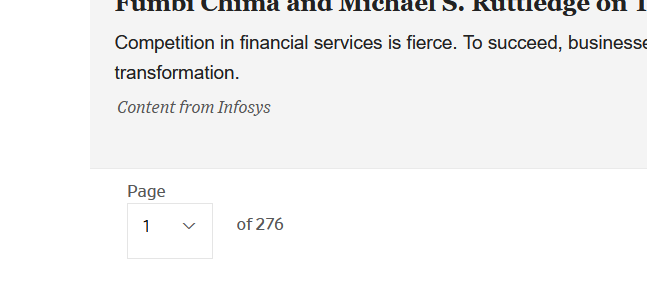

In [3]:
def getPagesNb(d,errors,url):
    for scroll in range(10):
        d.execute_script(
                    "window.scrollTo(0, document.body.scrollHeight);")
        sleep(1)
    try:
            pg=d.find_element(by=By.XPATH,value='//*[@id="main"]/div[5]/div/div/div/span')
            numberPages=int(re.findall(r'\d+', pg.text)[0])
    except NoSuchElementException:
            errors.append(url)
            numberPages=0
            pass
    return numberPages,errors

We are going to create a function that extracts articles by their XPATH that we are going to implement on every page

In [4]:
def extractArticle(d):
    
    l=[]
    for j in range(50):
        try:
            article=d.find_element(by=By.XPATH, value='//*[@id="main"]/article['+ str(j) + ']')
            l.append(article.text)
        except NoSuchElementException:
            if j>20:
                break  
            else:
                pass
    return l

# Web Scrapping

We are using the standard way of scrapping data using selenium, we pass disable functions and load strategy eager to chrome options in order to disable pop ups and load the page fast

In [5]:
chrome_options = Options()
chrome_options.add_argument("--disable-notifications")
chrome_options.add_argument("--incognito")
chrome_options.page_load_strategy = 'eager'
ser = Service(chromedriver.install())

        
    

We are going now to implement the data scrapping process, no worries about the fact that not all of the iterations are included here, because of the length of the process, I devided it into parts, and used different machines

In [31]:
errorsUrls=[]
articles=[]
datesCol=[]
for k in range(0,len(urls)):
    print("-----------------",k)
    articles_k = []
    driver = webdriver.Chrome(options=chrome_options,service=ser)
    driver.get(urls[k])
    pages,errorsUrls=getPagesNb(driver,errorsUrls,urls[k])
    l=extractArticle(driver)
    articles= articles+l
    datesCol=datesCol +([dates[k]]*len(l))
    sleep(1)
    for i in range(2,pages+1):
        while len(articles_k)<61 :
            driver.get(urls[k]+'&page='+str(i))
            l=extractArticle(driver)
            articles= articles+l
            articles_k = articles_k+l
            datesCol=datesCol +([dates[k]]*len(l)) 
    driver.close()
    print("----->",len(articles_k))

----------------- 2920
-----> 75
----------------- 2921
-----> 0
----------------- 2922
-----> 65
----------------- 2923
-----> 78
----------------- 2924
-----> 78
----------------- 2925
-----> 62
----------------- 2926
-----> 78
----------------- 2927
-----> 66
----------------- 2928
-----> 80
----------------- 2929
-----> 0
----------------- 2930
-----> 0
----------------- 2931
-----> 0
----------------- 2932
-----> 0
----------------- 2933
-----> 0
----------------- 2934
-----> 78
----------------- 2935
-----> 79
----------------- 2936
-----> 61
----------------- 2937
-----> 67
----------------- 2938
-----> 79
----------------- 2939
-----> 79
----------------- 2940
-----> 76
----------------- 2941
-----> 76
----------------- 2942
-----> 80
----------------- 2943
-----> 63
----------------- 2944
-----> 63
----------------- 2945
-----> 63
----------------- 2946
-----> 80
----------------- 2947
-----> 61
----------------- 2948
-----> 80
----------------- 2949
-----> 80
----------------

We get the length of the list of scrapped articles

In [32]:
len(articles)

5205

We get the length of the list of the errorsUrls, the pages where we get the urls, if this list is big compared to the length of the articles scrapped, it should give us an alarm about the scrapping process

In [34]:
len(errorsUrls)

23

We create a dataframe from the scrapped articles with their according dates

In [43]:
df = pd.DataFrame(list(zip(articles, datesCol)),
               columns =['articles', 'date'])

In [48]:
df

,articles,date
0,"STOCKS\nIn a Wild Year for Markets, Stocks Sti...",2021-12-30
1,"MARKETS\nAs Chinese IPOs Stumble, Investors Lo...",2021-12-30
2,U.S. MARKETS\nStocks Edge Lower in Year’s Last...,2021-12-30
3,MARKETS\nHong Kong Tech Stocks Surge on Last D...,2021-12-30
4,U.S. MARKETS\nStocks Finish Modestly Lower\nFr...,2021-12-30
...,...,...
5200,HEALTH\nBiogen and Eisai Rewrite Alzheimer’s D...,2022-03-14
5201,WSJ PRO\nPRO PE COMMENTARY ANALYSIS\nMegadeals...,2022-03-14
5202,COMMENTARY\nOpinion: Let’s Start Raising Inter...,2022-03-14
5203,BUSINESS\nVW Considers U.S.-Built Electric Tru...,2022-03-14


We save the data in a csv file

In [50]:
df.to_csv("allData.csv", index = False)